# TFG

In [1]:
# # Always run first
# import os
# import logging

# # Set the environment variable to enable debugging
# os.environ['TFG_DEBUG'] = '1'
# del os.environ['TFG_DEBUG'] # Delete it for the time being

# # if os.getenv('TFG_DEBUG', '1'):
# if os.getenv('TFG_DEBUG') == '1':
#     logging.basicConfig(level=logging.DEBUG)
#     logger = logging.getLogger(__name__)
#     logger.debug("Debugging is enabled. [Main IPYNB]")

# logging.basicConfig(level=logging.WARNING)

# # Remove the environment variable after use
# # del os.environ['TFG_DEBUG']

# Always run first - Proper logging setup
import os
import logging

# Clear any existing handlers to avoid duplicate logs
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

# Set up logging based on environment variable
if os.getenv('TFG_DEBUG') == '1':
    logging.basicConfig(
        level=logging.DEBUG,
        format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
    )
else:
    logging.basicConfig(
        level=logging.WARNING,
        format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
    )

# Get logger for this module
logger = logging.getLogger(__name__)

# Test logging
logger.debug("Debugging is enabled")
logger.warning("This warning should always appear")

2025-06-06 16:38:54,403 - __main__ - WARNING - This warning should always appear


In [2]:
# Main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder

# Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import VarianceThreshold

# Pipelines
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

# Cross-validation
from sklearn.model_selection import cross_val_score

# Package import Cache clear
import sys

import utils.matrix_builder
sys.path.append('/Users/rodrigodelama/Library/Mobile Documents/com~apple~CloudDocs/uc3m/TFG/code')

import importlib
import utils.basic_plots
importlib.reload(utils.basic_plots)
importlib.reload(utils.matrix_builder)
from utils.logger import get_logger
logger = get_logger(__name__)

# Utilities
# Do proper imports not this
# from utils.matrix_builder import *
from utils.matrix_builder import create_feature_matrix, create_feature_matrix_with_features
# from utils.basic_plots import *
from utils.basic_plots import plot_actual_vs_predicted, plot_error, plot_feature_importance
from utils.mini_models import mini_model

importlib.reload(utils.mini_models)

# Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
# import lightgbm as lgb

# Testing split
from sklearn.model_selection import train_test_split

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score

testing the matrix build

In [3]:
# read data
csv_hour_file = '../data/hour_14_metrics.csv'
df = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])
df = df[['Datetime', 'MarginalES']]

# Date range for the training matrix
# train_start_date = '2018-01-01'
train_start_date = '2018-12-25'
train_end_date = '2022-01-01'

train_subset_df = df[(df['Datetime'] >= train_start_date) & (df['Datetime'] <= train_end_date)]



##### 

# probar con eso tambien
# error de retorno con 0s
#! sumarle 0,001 a todo para que nunca sea 0
#! limpiar numeros negativos
    # subsanado con limpieza y posterior interpolacion

# benchmark 1 precios absolutos - precios CHECK
# benchmark 2 precios relativos - retornos CHECK
# benchmark 3 indicadores tecnicos
    # 1. media movil
    # 2. momentum
    # 3. RSI
    # 4. añdir los precios absolutos o relativos
# benchmark 4 random forest - probably not good because it doesn't detect peaks - hace medias, entonces nunca sale el valor mas bajo



# precios reales y precios relativos

# Sliding window size
window_size = 3

In [5]:
# Create sliding window matrix - method from utils.sliding_window
X_train, y_train = create_feature_matrix(train_subset_df, window_size)

Print to check the matrix

In [6]:
# print the shape of the matrix
print(X_train.shape, y_train.shape)

# print the actual matrix
print(X_train.head())
print(y_train.head())

# Lasso
# .coef_ da los pesos del modelo lineal
# las que sean cero o muy bajitas no van a tener peso en la decision

(1099, 3) (1099,)
       0      1      2
0  66.58  67.20  68.12
1  67.20  68.12  64.64
2  68.12  64.64  57.39
3  64.64  57.39  63.91
4  57.39  63.91  65.22
0    64.64
1    57.39
2    63.91
3    65.22
4    65.88
dtype: float64


## Build a simple regression model and train with the matrix

In [8]:
# Build a simple regression model and train with the matrix
model_lr = LinearRegression()

# Train with the training subset
model_lr.fit(X_train, y_train)

#! en vez de score llamar a predict y guardar los valors

#! bucle for
# predict


# Fit with the next subset up to the row before prediction

# Date range for the testing (fit) matrix
test_start_date = '2022-01-02'
# test_end_date = '2025-01-01'
test_end_date = '2025-03-17'

test_subset_df = df[(df['Datetime'] >= test_start_date) & (df['Datetime'] <= test_end_date)]

# Create sliding window matrix
X_test, y_test = create_feature_matrix(test_subset_df, window_size)

#! ERROR - you cannot fit the regression again with test data - its retraining the whole thing
#! Fit the model w test data
# model_lr.fit(X_test, y_test)

# llamar a fit con toda la matriz, con la anchura ventana deslizante
# y altura num of days back

#! me falta score con test
# llama a predict con la x y compara con mis ys
# guardar errores y predicciones
# std dev
# percentil

#! pickle para guardar sets de numeros en vez de numpy ??

# Predict the target values
# y_pred = model_lr.predict(X) # SOLO la lonchita
# predict o score para otros modelos
####### sólo predict con la ultima fila
# y_pred = model_lr.predict(X_test) #! SOLO la lonchita ???
# mse = mean_squared_error(y_test, y_pred)
# print(f"Test MSE: {mse}")

# mirar tambien Expectation Short-Fall
# mirar cual seria la peor prediccion
# la media del 5% peor de resultados
# buscar que el caso peor no sea tan malo?

# linear regressor has mean error 0 that why we do error cuadratico o absoluto

###### Predict con la ultima fila
# llamar a predict con solo la ultima fila (ancho)
X_last = X_test.iloc[-1, :].values.reshape(1, -1)
y_pred = model_lr.predict(X_last)
# mse = mean_squared_error(y_test, y_pred)
print(f"x_last: {X_last}")
print(f"y_pred: {y_pred}")

# Calculate the mean squared error and R2 score
# mse = mean_squared_error(y, y_pred)
# print('Mean squared error:', mse)
# r2 = r2_score(y, y_pred)
# print('R2 score:', r2)

# # Print 20 y and y_pred to visualize the difference
# print('Actual vs Predicted')
# print(pd.DataFrame({'Actual': y, 'Predicted': y_pred}).head(20))

# # Plot the actual vs. predicted values
# plt.figure(figsize=(10, 6))
# plt.plot(subset_df['Datetime'][window_size:], y, label='Actual')
# plt.plot(subset_df['Datetime'][window_size:], y_pred, label='Predicted')
# plt.legend()
# plt.show()

x_last: [[70.01 95.12 18.82]]
y_pred: [36.46482644]


## Now with the return values

Pasos a seguir

Calcular el retorno (en vez de usar los precios)
Interpolar (rellenar valores)
Coger el set completo y partir en dos

Entrenar con la primera mitad (bloque 1 de datos)
    - Train

Coger todo el set de datos anterior a la fila que queremos (bloque 2 de datos)
    - Fit

Hacer predict de la siguiente fila al set de datos anterior (resultado a predecir)


In [8]:
# window_size = 30

# # read return data
# csv_hour_file = '../data/clean_return_data.csv'
# df = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])
# df = df[['Datetime', 'Return']]

# # Date range for the training matrix
# # train_start_date = '2018-01-01'
# train_start_date = '2018-12-25'
# train_end_date = '2022-01-01'

# train_subset_df = df[(df['Datetime'] >= train_start_date) & (df['Datetime'] <= train_end_date)]

# # Create sliding window matrix
# X_train, y_train = create_sliding_window(train_subset_df, window_size)

# # Build a simple regression model and train with the matrix
# model_lr = LinearRegression()

# # Train with the training subset
# # model_lr.train(X_train, y_train)
# model_lr.fit(X_train, y_train)


# # Fit with the next subset up to the row before prediction

# # Date range for the testing (fit) matrix
# test_start_date = '2022-01-02'
# # test_end_date = '2025-01-01'
# test_end_date = '2025-03-17'

# test_subset_df = df[(df['Datetime'] >= test_start_date) & (df['Datetime'] <= test_end_date)]

# # Create sliding window matrix
# X_test, y_test = create_sliding_window(test_subset_df, window_size)

# #! no usar sólo la lonchita - usar toda la matriz de la que considere que tengo memoria
# #! programar distintas ventanas fijas de memoria
# #! mirar el error que dan las distintas memorias y comparar
# y_pred = model_lr.predict(X_test) # SOLO la lonchita ??? NO error
# mse = mean_squared_error(y_test, y_pred)
# print(f"Test MSE: {mse}")

# # linear regressor has mean error 0 that why we do error cuadratico o absoluto

# # llamar a predict con solo la ultima fila (ancho)
# X_last = X_test.iloc[-1, :].values.reshape(1, -1)
# y_pred = model_lr.predict(X_last)
# # mse = mean_squared_error(y_test, y_pred)
# print(f"x_last: {X_last}")
# print(f"y_pred: {y_pred}")

In [9]:
# For later on...
#! Build a simple random forest model and train with the matrix

# model_rf = sklearn RandomForest()
# model_rf.fit(X, y)

# # llamar a fit con toda la matriz, con la anchura ventana deslizante
# # y altura num of days back

# # Predict the target values
# y_pred = model_rf.predict(X)

# # llamar a predict con solo una fila (ancho)

# # Calculate the mean squared error and R2 score
# mse = mean_squared_error(y, y_pred)
# print('Mean squared error:', mse)
# r2 = r2_score(y, y_pred)
# print('R2 score:', r2)

# # Print 20 y and y_pred to visualize the difference
# print('Actual vs Predicted')
# print(pd.DataFrame({'Actual': y, 'Predicted': y_pred}).head(20))

# # Plot the actual vs. predicted values
# plt.figure(figsize=(10, 6))
# plt.plot(subset_df['Datetime'][window_size:], y, label='Actual')
# plt.plot(subset_df['Datetime'][window_size:], y_pred, label='Predicted')
# plt.legend()
# plt.show()

## Añadiendo columnas
Calcularemos varias metricas con la libreria "ta" - technical analysis

### Próximos pasos
- Añadir columnas de métricas de precios
  - Media móvil corta (a pocos días)
  - Media móvil larga (a muchos días)
  - RSI
  - Volatilidad
  - Momentum
- Probar regresión otra vez
- Verificar con
  - MSE
  - RMSE
  - 95th percentil
  - R² modificado?
- Mirar foto - usar en el sumatorio de abajo, las etiquetas de train
- Probar Lasso
- Mirar error (distintas métricas)
- Mirar pesos que escoge - aprender del modelo


In [ ]:
# Añadir columnas de metricas de precios
    # media movil corta (a pocos dias)
    # media movil larga (a muchos dias)
    # RSI
    # volatilidad
    # momentum

# probar regresion otra vez
    # verificar con
    # mse
    # rmse
    # 95th percentil

# R^2 modificado?
# mirar foto - usar en el sumatorio de abajo, las etiquetas de train

window_size = 30

# read prices data
csv_hour_file = '../data/ta_metrics/0401_price_metrics_hour_14.csv'
# csv_hour_file = '../data/ta_metrics/0401_price_metrics_hour_14'
# read return data
# csv_hour_file = '../data/ta_metrics/new_return_metrics_hour_14.csv'
csv_hour_file = '../data/ta_metrics/final_price_ta_metrics.csv'

df = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])

# split in two
# Train
# Test

#! Expandir esto para incluir nuevas metricas (mas columnas)
df_prices = df[['Datetime', 'MarginalES']]

# Select all relevant columns except 'Datetime'
feature_columns = df.columns[1:]  # Exclude 'Datetime'
df = df[['Datetime'] + list(feature_columns)]

In [14]:
print(df_prices)

                Datetime  MarginalES
0    2018-06-29 14:00:00       63.17
1    2018-06-30 14:00:00       57.89
2    2018-07-01 14:00:00       55.00
3    2018-07-02 14:00:00       64.97
4    2018-07-03 14:00:00       62.52
...                  ...         ...
2255 2025-03-13 14:00:00       95.12
2256 2025-03-14 14:00:00       18.82
2257 2025-03-15 14:00:00        0.00
2258 2025-03-16 14:00:00       11.37
2259 2025-03-17 14:00:00       50.24

[2260 rows x 2 columns]


In [15]:
print(df)

                Datetime  MarginalES      SMA_3   SMA_5      SMA_7     SMA_14  \
0    2018-06-29 14:00:00       63.17  63.636667  63.874  62.838571  60.590714   
1    2018-06-30 14:00:00       57.89  61.520000  62.580  62.480000  60.797143   
2    2018-07-01 14:00:00       55.00  58.686667  60.760  61.751429  61.154286   
3    2018-07-02 14:00:00       64.97  59.286667  60.906  61.838571  61.690000   
4    2018-07-03 14:00:00       62.52  60.830000  60.710  61.612857  61.848571   
...                  ...         ...        ...     ...        ...        ...   
2255 2025-03-13 14:00:00       95.12  81.000000  65.484  48.034286  52.265000   
2256 2025-03-14 14:00:00       18.82  61.316667  67.828  49.605714  47.885714   
2257 2025-03-15 14:00:00        0.00  37.980000  52.364  49.462857  45.051429   
2258 2025-03-16 14:00:00       11.37  10.063333  39.064  50.072857  43.006429   
2259 2025-03-17 14:00:00       50.24  20.536667  35.110  46.204286  40.149286   

         SMA_30     SMA_90 

In [18]:
# Function to create the weight matrix, with the sliding window, and the columns of extra data points

# Right Alligned
# x1 x2 x3 sma_3
# sma_3 = x1+x2+x3 / 3
# def create_weight_matrix_more_columns(dataframe, window_size):
#     X, y = [], []
    
#     df_prices = dataframe[['Datetime', 'MarginalES']]
#     df_features = dataframe.iloc[:, 2:]  # Exclude 'Datetime' and 'MarginalES'
    
#     for i in range(window_size, len(df_prices)):
#         # Extract sliding window for prices (right-aligned)
#         window = df_prices.iloc[i-window_size:i, 1:].values.flatten()
        
#         # Extract corresponding feature row
#         feature_row = df_features.iloc[i-1].values.flatten()
        
#         # Concatenate sliding window prices with feature row
#         X.append(np.concatenate((window, feature_row)))
#         y.append(df_prices.iloc[i, 1])
    
#     return pd.DataFrame(X), pd.Series(y)

X_0313, y_0313 = create_feature_matrix_with_features(df, 3)

print(X_0313)

      price_t-3  price_t-2  price_t-1      SMA_3   SMA_5      SMA_7  \
0         63.17      57.89      55.00  58.686667  60.760  61.751429   
1         57.89      55.00      64.97  59.286667  60.906  61.838571   
2         55.00      64.97      62.52  60.830000  60.710  61.612857   
3         64.97      62.52      62.50  63.330000  60.576  61.364286   
4         62.52      62.50      62.50  62.506667  61.498  61.221429   
...         ...        ...        ...        ...     ...        ...   
2252      77.32      77.87      70.01  75.066667  46.660  43.015714   
2253      77.87      70.01      95.12  81.000000  65.484  48.034286   
2254      70.01      95.12      18.82  61.316667  67.828  49.605714   
2255      95.12      18.82       0.00  37.980000  52.364  49.462857   
2256      18.82       0.00      11.37  10.063333  39.064  50.072857   

         SMA_14     SMA_30     SMA_90    SMA_180  ...      ROC_14      ROC_30  \
0     61.154286  60.355667  54.455333  52.550444  ...   10.000000 

In [19]:
print(y_0313)

0       64.97
1       62.52
2       62.50
3       62.50
4       62.01
        ...  
2252    95.12
2253    18.82
2254     0.00
2255    11.37
2256    50.24
Name: price_t, Length: 2257, dtype: float64


Matrix w Indicators Read Test

In [21]:
# read data
# csv_hour_file = '/Users/rodrigodelama/Library/Mobile Documents/com~apple~CloudDocs/uc3m/TFG/data/ta_metrics/new_price_metrics_hour_14.csv'
csv_hour_file = '../data/ta_metrics/final_price_ta_metrics.csv'
df = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])

# Select all other columns except 'Datetime'
feature_columns = df.columns[1:]  # Excluding 'Datetime'
df = df[['Datetime'] + list(feature_columns)]

# Date range for the training matrix
train_start_date = '2018-12-25'
train_end_date = '2022-01-01'

train_subset_df = df[(df['Datetime'] >= train_start_date) & (df['Datetime'] <= train_end_date)]

print(train_subset_df.head())

# Sliding window size
window_size = 3

# Create sliding window matrix - method from utils.sliding_window
X_0606, y_0606 = create_feature_matrix_with_features(train_subset_df, window_size)

               Datetime  MarginalES      SMA_3   SMA_5      SMA_7     SMA_14  \
180 2018-12-25 14:00:00       66.58  66.410000  65.486  65.254286  65.138571   
181 2018-12-26 14:00:00       67.20  66.806667  66.286  65.697143  65.027857   
182 2018-12-27 14:00:00       68.12  67.300000  66.910  66.107143  65.175000   
183 2018-12-28 14:00:00       64.64  66.653333  66.636  66.312857  65.188571   
184 2018-12-29 14:00:00       57.39  63.383333  64.786  65.225714  64.780714   

        SMA_30     SMA_90    SMA_180      EMA_3  ...    ROC_14     ROC_30  \
180  64.897667  65.928111  67.057722  66.271517  ...  2.336305   4.999211   
181  65.193333  65.840333  67.109444  66.735758  ... -2.254545  15.206583   
182  65.195000  65.737556  67.182333  67.427879  ...  3.118377   0.073454   
183  65.166333  65.632000  67.180500  66.033940  ...  0.294802  -1.312977   
184  64.948000  65.458222  67.152000  61.711970  ... -9.049128 -10.243979   

         RSI_5      RSI_7     RSI_14     RSI_30   BB_Wid

In [28]:
print(X_0606)

      price_t-3  price_t-2  price_t-1       SMA_3    SMA_5       SMA_7  \
0         66.58      67.20      68.12   67.300000   66.910   66.107143   
1         67.20      68.12      64.64   66.653333   66.636   66.312857   
2         68.12      64.64      57.39   63.383333   64.786   65.225714   
3         64.64      57.39      63.91   61.980000   64.252   64.925714   
4         57.39      63.91      65.22   62.173333   63.856   64.722857   
...         ...        ...        ...         ...      ...         ...   
1095     312.88     248.61     193.73  251.740000  302.646  312.802857   
1096     248.61     193.73     103.64  181.993333  251.922  277.068571   
1097     193.73     103.64     116.76  138.043333  195.124  247.661429   
1098     103.64     116.76     205.62  142.006667  173.672  225.998571   
1099     116.76     205.62     184.94  169.106667  160.938  195.168571   

          SMA_14      SMA_30      SMA_90     SMA_180  ...     ROC_14  \
0      65.175000   65.195000   65.73755

In [24]:
print(y_0606.head())

0    64.64
1    57.39
2    63.91
3    65.22
4    65.88
Name: price_t, dtype: float64


In [25]:
# Build a simple regression model and train with the matrix
model_lr_0313 = LinearRegression()

# Split X and y in half for training and testing
split_idx = len(X_0313) // 2
X_train_0313, X_test_0313 = X_0313.iloc[:split_idx], X_0313.iloc[split_idx:]
y_train_0313, y_test_0313 = y_0313.iloc[:split_idx], y_0313.iloc[split_idx:]

# Train with the training subset
model_lr_0313.fit(X_train_0313, y_train_0313)

# testing this
y_pred_0313 = model_lr_0313.predict(X_test_0313) #! SOLO la lonchita ???
mse = mean_squared_error(y_test_0313, y_pred_0313)
print(f"Test MSE: {mse}")

# linear regressor has mean error 0 that why we do error cuadratico o absoluto

# llamar a predict con solo la ultima fila (ancho)
# X_last_0313 = X_test_0313.iloc[-1, :].values.reshape(1, -1)
X_last_0313 = X_test_0313.iloc[[-1]]  # double brackets preserve DataFrame structure with column names
y_pred_0313 = model_lr_0313.predict(X_last_0313)
# mse = mean_squared_error(y_0313, y_pred_0313)
print(f"x_last_0313: {X_last_0313}")
print(f"y_pred_0313: {y_pred_0313}")

Test MSE: 4574.270491637872
x_last_0313:       price_t-3  price_t-2  price_t-1      SMA_3   SMA_5      SMA_7  \
2256      18.82        0.0      11.37  10.063333  39.064  50.072857   

         SMA_14  SMA_30     SMA_90    SMA_180  ...  ROC_14     ROC_30  \
2256  43.006429  45.961  66.433778  64.102389  ... -71.575 -82.507692   

          RSI_5      RSI_7     RSI_14    RSI_30    BB_Width      ATR_7  \
2256  38.635244  41.445337  45.335128  47.40038  316.369287  27.514882   

         ATR_14     ATR_30  
2256  29.106351  29.588447  

[1 rows x 28 columns]
y_pred_0313: [52.80613543]


## Lasso
- mirar error (distintas metricas)
- mirar pesos que escoge - aprender del modelo

In [16]:
# Añadir columnas de metricas de precios
    # media movil corta (a pocos dias)
    # media movil larga (a muchos dias)
    # RSI
    # volatilidad
    # momentum

# probar regresion otra vez
    # verificar con
    # mse
    # rmse
    # 95th percentil

# R^2 modificado?
# mirar foto - usar en el sumatorio de abajo, las etiquetas de train

# read prices data
csv_hour_file = '../data/ta_metrics/0401_price_metrics_hour_14.csv'

df_lasso = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])

df_lasso_prices = df_lasso[['Datetime', 'MarginalES']]

# Select all relevant columns except 'Datetime'
feature_columns = df_lasso.columns[1:]  # Exclude 'Datetime'
df_lasso = df_lasso[['Datetime'] + list(feature_columns)]

In [17]:
X_0313_lasso, y_0313_lasso = create_weight_matrix_with_features(df_lasso, window_size=3)

In [18]:
# Build a simple regression model and train with the matrix
model_lasso_0313 = Lasso()

# split in two
# Train
# Test

# Split X and y in half for training and testing
split_idx = len(X_0313_lasso) // 2
X_train_0313_lasso, X_test_0313_lasso = X_0313_lasso.iloc[:split_idx], X_0313_lasso.iloc[split_idx:]
y_train_0313_lasso, y_test_0313_lasso = y_0313_lasso.iloc[:split_idx], y_0313_lasso.iloc[split_idx:]

print(X_test_0313_lasso)

# Train with the training subset
model_lasso_0313.fit(X_train_0313_lasso, y_train_0313_lasso)

# testing this
y_pred_0313_lasso = model_lasso_0313.predict(X_test_0313_lasso) #! SOLO la lonchita ???
mse = mean_squared_error(y_test_0313_lasso, y_pred_0313_lasso)
print(f"Test MSE: {mse}")

#! Pending on 95th, 99th percentile errors ???

# linear regressor has mean error 0 that why we do error cuadratico o absoluto

# llamar a predict con solo la ultima fila (ancho)
X_last_0313_lasso = X_test_0313_lasso.iloc[-1, :].values.reshape(1, -1)
# y_actual_0313_lasso = X_test_0313_lasso.
y_pred_0313_lasso = model_lasso_0313.predict(X_last_0313_lasso)
# mse = mean_squared_error(y_0313_lasso, y_pred_0313_lasso)
print(f"x_last_0313_lasso: {X_last_0313_lasso}")
# print(f"y_actual_0313_lasso: {y_actual_0313_lasso}")
print(f"y_pred_0313_lasso: {y_pred_0313_lasso}")

      price_t-3  price_t-2  price_t-1       SMA_3    SMA_5       SMA_7  \
1027     198.41     193.73     188.69  193.610000  201.760  196.632857   
1028     193.73     188.69     179.70  187.373333  195.356  198.198571   
1029     188.69     179.70     183.27  183.886667  188.760  195.967143   
1030     179.70     183.27     188.69  183.886667  186.816  192.677143   
1031     183.27     188.69     190.70  187.553333  186.210  189.027143   
...         ...        ...        ...         ...      ...         ...   
2049      77.32      77.87      70.01   75.066667   46.660   43.015714   
2050      77.87      70.01      95.12   81.000000   65.484   48.034286   
2051      70.01      95.12      18.82   61.316667   67.828   49.605714   
2052      95.12      18.82       0.00   37.980000   52.364   49.462857   
2053      18.82       0.00      11.37   10.063333   39.064   50.072857   

          SMA_14      SMA_30      SMA_60      SMA_90  ...      EMA_30  \
1027  198.018571  180.985333  154.3826

/Users/rodrigodelama/Library/Mobile Documents/com~apple~CloudDocs/uc3m/TFG/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [19]:
# Get the coefficients (weights)
print(model_lasso_0313.coef_)

# Get the intercept (bias term)
print(model_lasso_0313.intercept_)

[-0.00000000e+00  3.97052723e-02  4.86430415e-01  0.00000000e+00
 -9.61532855e-01  1.35026253e+00 -0.00000000e+00  0.00000000e+00
  1.38355989e-01  2.54449188e-02  0.00000000e+00 -5.87676183e-02
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -7.23230653e-04 -4.11398233e-04  9.32660027e-05
  2.29405100e-04 -1.52468269e-04  2.27829254e-04  6.13576575e-02
  0.00000000e+00 -0.00000000e+00]
-3.52525393844347


## Ridge

In [20]:
# read prices data
csv_hour_file = '../data/ta_metrics/0401_price_metrics_hour_14.csv'

df_ridge = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])

df_ridge_prices = df_ridge[['Datetime', 'MarginalES']]

# Select all relevant columns except 'Datetime'
feature_columns = df_ridge.columns[1:]  # Exclude 'Datetime'
df_ridge = df_ridge[['Datetime'] + list(feature_columns)]

X_0313_ridge, y_0313_ridge = create_weight_matrix_with_features(df_ridge, window_size=3)

In [21]:
# Build a simple regression model and train with the matrix
model_ridge_0313 = Ridge()

# split in two
# Train
# Test

# Split X and y in half for training and testing
split_idx = len(X_0313_ridge) // 2
X_train_0313_ridge, X_test_0313_ridge = X_0313_ridge.iloc[:split_idx], X_0313_ridge.iloc[split_idx:]
y_train_0313_ridge, y_test_0313_ridge = y_0313_ridge.iloc[:split_idx], y_0313_ridge.iloc[split_idx:]

print(X_test_0313_ridge)

# Train with the training subset
model_ridge_0313.fit(X_train_0313_ridge, y_train_0313_ridge)

# testing this
y_pred_0313_ridge = model_ridge_0313.predict(X_test_0313_ridge) # SOLO la ultima fila
mse = mean_squared_error(y_test_0313_ridge, y_pred_0313_ridge)
print(f"Test MSE: {mse}")

#! Pending on 95th, 99th percentile errors ???


# linear regressor has mean error 0 that why we do error cuadratico o absoluto

# llamar a predict con solo la ultima fila (ancho)
X_last_0313_ridge = X_test_0313_ridge.iloc[-1, :].values.reshape(1, -1)
# y_actual_0313_ridge = X_test_0313_ridge.
y_pred_0313_ridge = model_ridge_0313.predict(X_last_0313_ridge)
# mse = mean_squared_error(y_0313_ridge, y_pred_0313_ridge)
print(f"x_last_0313_ridge: {X_last_0313_ridge}")
# print(f"y_actual_0313_ridge: {y_actual_0313_ridge}")
print(f"y_pred_0313_ridge: {y_pred_0313_ridge}")

      price_t-3  price_t-2  price_t-1       SMA_3    SMA_5       SMA_7  \
1027     198.41     193.73     188.69  193.610000  201.760  196.632857   
1028     193.73     188.69     179.70  187.373333  195.356  198.198571   
1029     188.69     179.70     183.27  183.886667  188.760  195.967143   
1030     179.70     183.27     188.69  183.886667  186.816  192.677143   
1031     183.27     188.69     190.70  187.553333  186.210  189.027143   
...         ...        ...        ...         ...      ...         ...   
2049      77.32      77.87      70.01   75.066667   46.660   43.015714   
2050      77.87      70.01      95.12   81.000000   65.484   48.034286   
2051      70.01      95.12      18.82   61.316667   67.828   49.605714   
2052      95.12      18.82       0.00   37.980000   52.364   49.462857   
2053      18.82       0.00      11.37   10.063333   39.064   50.072857   

          SMA_14      SMA_30      SMA_60      SMA_90  ...      EMA_30  \
1027  198.018571  180.985333  154.3826

/Users/rodrigodelama/Library/Mobile Documents/com~apple~CloudDocs/uc3m/TFG/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [22]:
# Get the coefficients (weights)
print(model_ridge_0313.coef_)

# Get the intercept (bias term)
print(model_ridge_0313.intercept_)

[ 1.56445013e-04 -7.63577678e-01 -2.29910070e+00 -1.02084065e+00
 -1.67716248e+00  2.90427296e+00  9.13063312e-01 -8.55665430e-01
 -4.25424877e-01 -7.56570868e-02  5.84133381e-02 -1.14686852e-01
  9.75737644e+00 -9.79163220e-01 -5.75200331e+00 -2.14902160e+00
  3.49277389e+00 -8.77525474e-04 -2.54436353e-04 -1.98173764e-04
  3.59788517e-04 -2.92601203e-04  2.31507483e-04  1.15942049e+00
 -2.17093094e+00  1.25391523e+00]
-12.22493396139582


In [23]:
# # Scatter plot of actual vs predicted values
# plt.figure(figsize=(8, 6))
# plt.scatter(y_test_0313_ridge, y_pred_0313_ridge, alpha=0.5, color="blue", label="Predicted vs Actual")
# plt.plot([min(y_test_0313_ridge), max(y_test_0313_ridge)], [min(y_test_0313_ridge), max(y_test_0313_ridge)], color="red", linestyle="dashed", label="Perfect Fit")
# plt.xlabel("Actual Values")
# plt.ylabel("Predicted Values")
# plt.title("Random Forest: Predictions vs Actual")
# plt.legend()
# plt.grid(True)
# plt.show()


## Random Forest

In [24]:
# read prices data
csv_hour_file = '../data/ta_metrics/0401_price_metrics_hour_14.csv'

df_randomforest = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])

df_randomforest_prices = df_randomforest[['Datetime', 'MarginalES']]

# Select all relevant columns except 'Datetime'
feature_columns = df_randomforest.columns[1:]  # Exclude 'Datetime'
df_randomforest = df_randomforest[['Datetime'] + list(feature_columns)]

X_0313_randomforest, y_0313_randomforest = create_weight_matrix_with_features(df_randomforest, window_size=3)

In [25]:
# Split data
X_train_0313_randomforest, X_test_0313_randomforest, y_train_0313_randomforest, y_test_0313_randomforest = train_test_split(X_0313_randomforest, y_0313_randomforest, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_0313_randomforest, y_train_0313_randomforest)

# Predictions
X_last_0313_randomforest = X_test_0313_randomforest.iloc[-1, :].values.reshape(1, -1)
y_pred_0313_randomforest = rf.predict(X_test_0313_randomforest)
print(f"x_last_0313_randomforest: {X_last_0313_randomforest}")
print(f"y_pred_0313_randomforest: {y_pred_0313_randomforest}")

# Evaluate model
mse = mean_squared_error(y_test_0313_randomforest, y_pred_0313_randomforest)
r2 = r2_score(y_test_0313_randomforest, y_pred_0313_randomforest)

print(f"Random Forest MSE: {mse:.4f}")
print(f"Random Forest R²: {r2:.4f}")

#! Pending on 95th, 99th percentile errors ???

x_last_0313_randomforest: [[140.37       114.1        149.76       134.74333333 146.178
  152.91       144.15571429 129.28833333 113.696      105.55433333
   85.12344444  63.54377778 140.69363966 142.86407028 144.08886906
  142.03518212 132.22444532   6.46950092 -14.78320246  -3.89527049
   15.6626506   18.48101266  43.29729213  53.15319391  52.92343513
   53.55157464]]
y_pred_0313_randomforest: [ 33.6732  28.496   99.7491  65.7525 212.4098  44.3405  28.2197  30.1935
 108.7983 321.5384 100.8523  84.9465 181.5139 119.1919  53.9262  35.7718
 116.3988  96.651  402.5596 183.6243 183.9529  23.593   35.4156  51.7268
  50.5639  36.8705  34.9336  96.3897 128.1119  24.5739  58.774   41.1034
  53.2723  97.3349  45.98    43.4317 109.0216  34.5123  65.2278  79.4146
  26.7283  48.8596  50.9208  44.2915 142.1758  69.3832  77.6038  19.8414
 133.3849  36.5485  30.7886  32.1043  43.4779 141.0266  95.5656  67.7354
 185.1936  45.4534 129.5057  10.0743  56.9804  22.3028  33.2442  37.7886
  33.1927 120.671

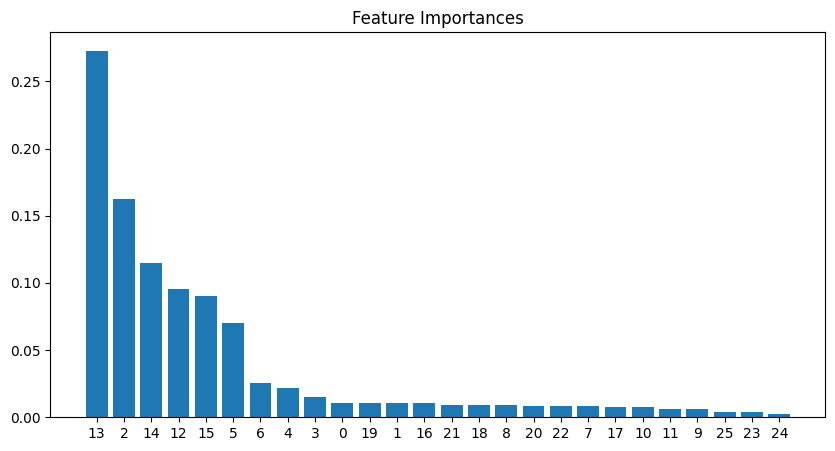

In [26]:
# Get feature importance
feature_importance = rf.feature_importances_

# Sort and plot
indices = np.argsort(feature_importance)[::-1]
plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(X_0313_randomforest.shape[1]), feature_importance[indices], align="center")
plt.xticks(range(X_0313_randomforest.shape[1]), indices)
plt.show()

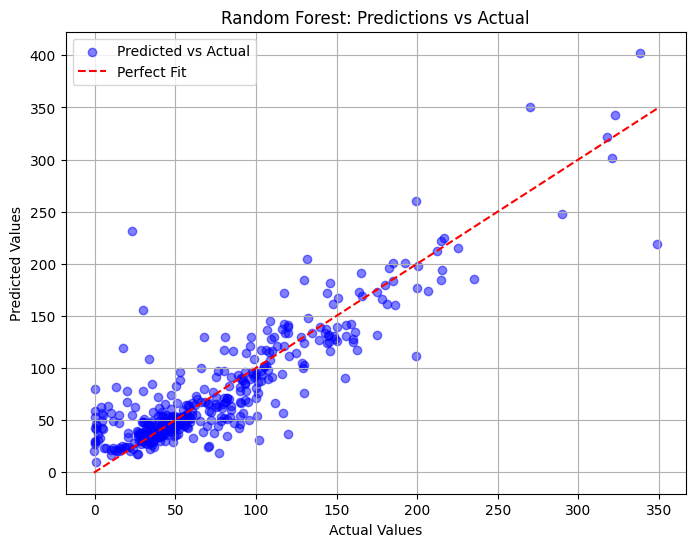

In [27]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_0313_randomforest, y_pred_0313_randomforest, alpha=0.5, color="blue", label="Predicted vs Actual")
plt.plot([min(y_test_0313_randomforest), max(y_test_0313_randomforest)], [min(y_test_0313_randomforest), max(y_test_0313_randomforest)], color="red", linestyle="dashed", label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Predictions vs Actual")
plt.legend()
plt.grid(True)
plt.show()


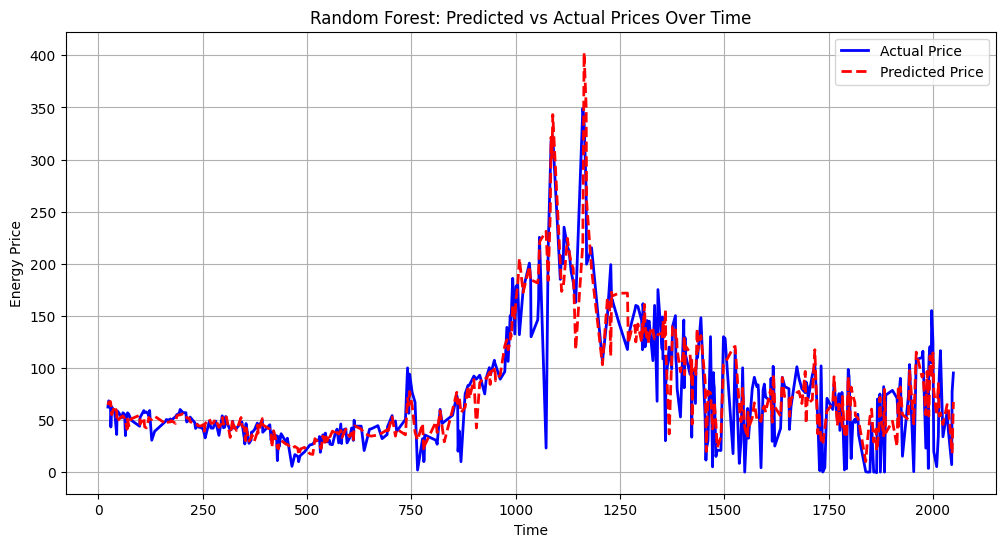

In [28]:
# Assuming X_test has a DateTime index or a corresponding time column
time_series = X_test_0313_randomforest.index if isinstance(X_test_0313_randomforest, pd.DataFrame) else range(len(y_test_0313_randomforest))

# Sort values by time (just in case)
sorted_indices = np.argsort(time_series)
time_series_sorted = np.array(time_series)[sorted_indices]
y_test_sorted = np.array(y_test_0313_randomforest)[sorted_indices]
y_pred_sorted = np.array(y_pred_0313_randomforest)[sorted_indices]

# Plot actual vs predicted over time
plt.figure(figsize=(12, 6))
plt.plot(time_series_sorted, y_test_sorted, label="Actual Price", color="blue", linewidth=2)
plt.plot(time_series_sorted, y_pred_sorted, label="Predicted Price", color="red", linestyle="dashed", linewidth=2)
plt.xlabel("Time")
plt.ylabel("Energy Price")
plt.title("Random Forest: Predicted vs Actual Prices Over Time")
plt.legend()
plt.grid(True)
plt.show()

# Random forest tiende a suavizar
# No es capaz de predecir el pico

# En mi caso es mas importante saber la tendencia



# crear un detector de picos en los datos ??
# error total y error sin picos


# menos honesto
# windsorizar los datos - meter todo entre el percentil 5 y el percentil 95


# Entrenar sin picos? suavizar sin picos

# problema de regresion lineal y train linea con outliers - usar para train o no?


# Expectation short fall of 95th percentile

# la media de los dias que está mal, cuanto nos la vamos a pegar

# rolling window de pandas y mirar como alinear

# SMA_180 o 182 - 30 dias? 

# SMA 3 4 7 esta bien, pero mas mejor 14 - 30 - 60 - 90 - 180 - 360

# esto depende del horizonte

## XGBoost

In [29]:
# # Train XGBoost
# xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
# xgb.fit(X_train, y_train)

# # Predictions
# y_pred_xgb = xgb.predict(X_test)

# # Evaluate
# mse_xgb = mean_squared_error(y_test, y_pred_xgb)
# r2_xgb = r2_score(y_test, y_pred_xgb)

# print(f"XGBoost MSE: {mse_xgb:.4f}")
# print(f"XGBoost R²: {r2_xgb:.4f}")

# #! Pending on 95th, 99th percentile errors ???

NameError: name 'XGBRegressor' is not defined

## LightGBM

In [ ]:
# # Create LightGBM dataset
# lgb_train = lgb.Dataset(X_train, y_train)
# lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

# # Define model parameters
# params = {
#     "objective": "regression",
#     "metric": "rmse",
#     "num_leaves": 31,
#     "learning_rate": 0.1,
#     "verbose": -1
# }

# # Train with early stopping using callbacks
# lgbm = lgb.train(
#     params,
#     lgb_train,
#     valid_sets=[lgb_test],
#     callbacks=[lgb.early_stopping(10), lgb.log_evaluation(10)]  # Correct usage
# )

# # Make predictions
# y_pred_lgb = lgbm.predict(X_test, num_iteration=lgbm.best_iteration)

# # Evaluate performance
# mse_lgb = mean_squared_error(y_test, y_pred_lgb)
# print(f"LightGBM MSE: {mse_lgb:.4f}")

## XGBoost vs LightGBM performance

In [ ]:
# plt.figure(figsize=(12, 6))

# plt.plot(time_series_sorted, y_test_sorted, label="Actual Price", color="blue", linewidth=2)
# plt.plot(time_series_sorted, y_pred_xgb[sorted_indices], label="XGBoost Prediction", color="red", linestyle="dashed", linewidth=2)
# plt.plot(time_series_sorted, y_pred_lgb[sorted_indices], label="LightGBM Prediction", color="green", linestyle="dashed", linewidth=2)

# plt.xlabel("Time")
# plt.ylabel("Energy Price")
# plt.title("Predicted vs Actual Prices Over Time")
# plt.legend()
# plt.grid(True)
# plt.show()

## Peak analysis

In [ ]:
# Analyze how many peaks, how many outliers


## Change of approach to use Memory (a sliding window) for "mini" models

In [30]:
from utils import mini_models

In [31]:
# Read DB
csv_db_file = '../data/hour_14_metrics.csv'
df_sw = pd.read_csv(csv_db_file, parse_dates=['Datetime'])
df_sw = df_sw[['Datetime', 'MarginalES']]

# Date range
start_date = '2018-01-01'
end_date = '2025-03-18'

subset_df = df_sw[(df_sw['Datetime'] >= start_date) & (df_sw['Datetime'] <= end_date)]

In [ ]:
### Short Stationarity (3 rowss)
stationarity_depth = 3

window_size = 3

# Create sliding window weight matrix
X_subset_to_trim, y_subset_to_trim = create_weight_matrix(subset_df, window_size)

print("____________ X_subset_to_trim")
print(X_subset_to_trim)
print("____________ END X_subset_to_trim")

print("____________ y_subset_to_trim")
print(y_subset_to_trim)
print("____________ END y_subset_to_trim")

# STEPS
# For loop - as many rows as available in y_subset_to_trim
    # Make subsets of however many rows as stationarity_depth indicates
    
    # Train mini model with subset
    # Predict with the next row of the subset with that model
    
    # Save the predicted value to a y_pred series

# Compare y_subset_to_trim with y_pred in the available indexes

y_pred = pd.Series(index=y_subset_to_trim.index, dtype='float64')  # Initialize y_pred with same index as y_subset_to_trim

for i in range(y_subset_to_trim.size - stationarity_depth): # to avoid going out of bounds
    # Make subsets for training of the specified depth
    X_train = X_subset_to_trim.iloc[i:i + stationarity_depth]
    y_train = y_subset_to_trim.iloc[i:i + stationarity_depth]

    # Training the mini model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict the NEXT point after the training window
    X_predict = X_subset_to_trim.iloc[i + stationarity_depth].values.reshape(1, -1)
    y_predict = model.predict(X_predict)[0]

    # Save the predicted value
    y_pred.iloc[i + stationarity_depth] = y_predict

# Compare y_subset_to_trim with y_pred in the available indexes
print("Actual vs Predicted:")
print(pd.DataFrame({'Actual': y_subset_to_trim, 'Predicted': y_pred}))

# Calculating the error
valid_pred = y_pred.dropna()
valid_actual = y_subset_to_trim[valid_pred.index]
error = valid_actual - valid_pred
print("\nError:")
print(error)

plot_actual_vs_predicted(model, valid_actual, valid_pred, stationarity_depth)
plot_error(error)

In [ ]:
###  Long Stationarity supposition (lots of rows)
stationarity_depth = 365 # * 4

window_size = 3

# Create sliding window weight matrix
X_subset_to_trim, y_subset_to_trim = create_weight_matrix(subset_df, window_size)

print("____________ X_subset_to_trim")
print(X_subset_to_trim)
print("____________ END X_subset_to_trim")

print("____________ y_subset_to_trim")
print(y_subset_to_trim)
print("____________ END y_subset_to_trim")

# Initialize y_pred with same index as y_subset_to_trim
y_pred = pd.Series(index=y_subset_to_trim.index, dtype='float64')

for i in range(y_subset_to_trim.size - stationarity_depth): # to avoid going out of bounds
    # Make subsets for training of the specified depth
    X_train = X_subset_to_trim.iloc[i:i + stationarity_depth]
    y_train = y_subset_to_trim.iloc[i:i + stationarity_depth]

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict the NEXT point after the training window
    X_predict = X_subset_to_trim.iloc[i + stationarity_depth].values.reshape(1, -1)
    y_predict = model.predict(X_predict)[0]

    # Save the predicted variable
    y_pred.iloc[i + stationarity_depth] = y_predict

# Compare y_subset_to_trim with y_pred in the available indexes
print("Actual vs Predicted:")
print(pd.DataFrame({'Actual': y_subset_to_trim, 'Predicted': y_pred}))

#calculate error.
valid_pred = y_pred.dropna()
valid_actual = y_subset_to_trim[valid_pred.index]
error = valid_actual - valid_pred
print("\nError:")
print(error)

plot_actual_vs_predicted(model, valid_actual, valid_pred, stationarity_depth)
plot_error(error)

Now using more features:

In [ ]:
# def create_weight_matrix(data, window_size, target_col='MarginalES'):
#     """
#     Creates a feature matrix X with sliding windows of the target column and all other features,
#     and a corresponding target vector y containing the next price value.
    
#     Parameters:
#     - data: DataFrame with 'Datetime' and multiple feature columns
#     - window_size: Size of the sliding window
#     - target_col: Name of the column to predict (default: 'MarginalES')
    
#     Returns:
#     - X: DataFrame with sliding windows features
#     - y: Series with target values (next price after each window)
#     """
#     # Remove datetime column if it exists
#     if 'Datetime' in data.columns:
#         data = data.drop('Datetime', axis=1)
    
#     # Get the number of features (columns)
#     n_features = data.shape[1]
    
#     # Initialize empty lists
#     X_data = []
#     y_data = []
    
#     # For each possible window start position
#     for i in range(len(data) - window_size):
#         # Get the window of data
#         window = data.iloc[i:i+window_size]
        
#         # Flatten the window into a single row
#         row = window.values.flatten()
        
#         # Add to X
#         X_data.append(row)
        
#         # Get the target value (next value of target column after window)
#         y_data.append(data[target_col].iloc[i + window_size])
    
#     # Convert to DataFrame and Series
#     X_df = pd.DataFrame(X_data)
#     y_series = pd.Series(y_data)
    
#     return X_df, y_series

In [ ]:
# Read DB w features
# csv_db_file = '../data/hour_14_metrics.csv'
csv_db_file = '../data/ta_metrics/0401_price_metrics_hour_14.csv'
df_sw = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])
df_sw = df_sw[['Datetime', 'MarginalES']]

# Date range
start_date = '2018-01-01'
end_date = '2025-03-18'

subset_df_features = df_sw[(df_sw['Datetime'] >= start_date) & (df_sw['Datetime'] <= end_date)]

In [ ]:
###  Long Stationarity supposition (lots of rows)
stationarity_depth = 3

window_size = 3

# Create sliding window weight matrix
X_subset_to_trim, y_subset_to_trim = create_weight_matrix(subset_df_features, window_size)

print("____________ X_subset_to_trim")
print(X_subset_to_trim)
print("____________ END X_subset_to_trim")

# Initialize y_pred with same index as y_subset_to_trim
y_pred = pd.Series(index=y_subset_to_trim.index, dtype='float64')

for i in range(y_subset_to_trim.size - stationarity_depth): # to avoid going out of bounds
    # Make subsets for training of the specified depth
    X_train = X_subset_to_trim.iloc[i:i + stationarity_depth]
    y_train = y_subset_to_trim.iloc[i:i + stationarity_depth]

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict the NEXT point after the training window
    X_predict = X_subset_to_trim.iloc[i + stationarity_depth].values.reshape(1, -1)
    y_predict = model.predict(X_predict)[0]

    # Save the predicted variable
    y_pred.iloc[i + stationarity_depth] = y_predict

# Compare y_subset_to_trim with y_pred in the available indexes
print("Actual vs Predicted:")
print(pd.DataFrame({'Actual': y_subset_to_trim, 'Predicted': y_pred}))

#calculate error.
valid_pred = y_pred.dropna()
valid_actual = y_subset_to_trim[valid_pred.index]
error = valid_actual - valid_pred
print("\nError:")
print(error)

In [ ]:
plot_actual_vs_predicted(model, valid_actual, valid_pred, stationarity_depth)
plot_error(error)

Now changing to Lasso for different weights

In [ ]:
###  Long Stationarity supposition (lots of rows)
stationarity_depth = 3

window_size = 3

# Create sliding window weight matrix
X_subset_to_trim, y_subset_to_trim = create_weight_matrix(subset_df_features, window_size)

print("____________ X_subset_to_trim")
print(X_subset_to_trim)
print("____________ END X_subset_to_trim")


# Initialize y_pred with same index as y_subset_to_trim
y_pred = pd.Series(index=y_subset_to_trim.index, dtype='float64')

for i in range(y_subset_to_trim.size - stationarity_depth): # to avoid going out of bounds
    # Make subsets for training of the specified depth
    X_train = X_subset_to_trim.iloc[i:i + stationarity_depth]
    y_train = y_subset_to_trim.iloc[i:i + stationarity_depth]

    # Train the model
    model = Lasso()
    model.fit(X_train, y_train)

    # Predict the NEXT point after the training window
    # X_predict = X_subset_to_trim.iloc[i + stationarity_depth].values.reshape(1, -1)
    X_predict = X_subset_to_trim.iloc[[i + stationarity_depth]]  # Keep as DataFrame with column names - useful for feature importance
    y_predict = model.predict(X_predict)[0]

    # Save the predicted variable
    y_pred.iloc[i + stationarity_depth] = y_predict

# Compare y_subset_to_trim with y_pred in the available indexes
print("Actual vs Predicted:")
print(pd.DataFrame({'Actual': y_subset_to_trim, 'Predicted': y_pred}))

#calculate error.
valid_pred = y_pred.dropna()
valid_actual = y_subset_to_trim[valid_pred.index]
error = valid_actual - valid_pred
print("\nError:")
print(error)

plot_actual_vs_predicted(model, valid_actual, valid_pred, stationarity_depth)
plot_error(error)

# Corrected the procedure

In [ ]:
# Read DB w features
csv_db_file = '../data/ta_metrics/0401_price_metrics_hour_14.csv'

# Read all columns from the CSV file
df_sw = pd.read_csv(csv_db_file, parse_dates=['Datetime'])

# Date range
start_date = '2018-01-01'
end_date = '2025-03-18'

# Filter by date range but keep all columns
subset_df_features = df_sw[(df_sw['Datetime'] >= start_date) & (df_sw['Datetime'] <= end_date)]

In [ ]:
###  Short Stationarity Depth
stationarity_depth = 3

window_size = 3

model = LinearRegression()

valid_pred, valid_actual, error, X_combined = mini_model(model, subset_df_features, window_size, stationarity_depth)

plot_actual_vs_predicted(model, valid_actual, valid_pred, stationarity_depth)
plot_error(error)

In [ ]:
###  Short Stationarity Depth
stationarity_depth = 3

window_size = 3

from utils.mini_models import mini_model

importlib.reload(utils.mini_models)

# model = Lasso()
# valid_pred, valid_actual, error, X_combined = mini_model(model, subset_df_features, window_size, stationarity_depth)

alpha = 0.05

valid_pred, valid_actual, error, X_combined = mini_model(
    model = Lasso(alpha = alpha),
    subset_df_features = subset_df_features,
    window_size = 7,
    stationarity_depth = 30,
    model_name = f"lasso_alpha_{alpha}_ws_{window_size}_sd_{stationarity_depth}",
    save_dir = f"models/lasso_alpha_{alpha}", # if not should default /models/model_name folder
    debug = True,  # Enable detailed output
    save_every_step = True,
)


plot_actual_vs_predicted(model, valid_actual, valid_pred, stationarity_depth)
plot_error(error)

In [ ]:
importlib.reload(utils.mini_models)

In [ ]:
importlib.reload(utils.mini_models)

###  Short Stationarity Depth
stationarity_depth = 3

window_size = 3

model = RandomForestRegressor()

valid_pred, valid_actual, error, X_combined = mini_model(
    model = Lasso(alpha = alpha),
    subset_df_features = subset_df_features,
    window_size = 7,
    stationarity_depth = 30,
    model_name = f"random_forest_ws_{window_size}_sd_{stationarity_depth}",
    save_dir = f"models/random_forest", # if not should default /models/model_name folder
    debug = True,  # Enable detailed output
    save_every_step = True,
)

valid_pred, valid_actual, error, X_combined = mini_model(model, subset_df_features, window_size, stationarity_depth)

In [ ]:
plot_actual_vs_predicted(model, valid_actual, valid_pred, stationarity_depth)
plot_error(error)

In [ ]:
# Most relevant features of the Random Forest
# Get feature importance
plot_feature_importance(model, X_combined)

# feature_importance = model.feature_importances_
# # Sort and plot
# indices = np.argsort(feature_importance)[::-1]
# plt.figure(figsize=(10, 5))
# plt.title("Feature Importances")
# # Feature names
# feature_names = X_combined.columns.tolist()
# # Sort feature names according to importance
# sorted_feature_names = [feature_names[i] for i in indices]
# plt.bar(range(X_combined.shape[1]), feature_importance[indices], align="center")
# plt.xticks(range(X_combined.shape[1]), sorted_feature_names, rotation=90)
# plt.xlabel("Feature")
# plt.ylabel("Importance")
# plt.tight_layout()
# plt.show()

## Deep Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the most complex RF model possible
complex_rf = RandomForestRegressor(
    n_estimators=500,          # Large number of trees
    max_depth=None,            # Unlimited depth
    min_samples_split=2,       # Minimum to continue splitting
    min_samples_leaf=1,        # Allow leaf nodes with just 1 sample
    max_features='sqrt',       # Consider sqrt(n_features) features per split
    bootstrap=True,            # Use bootstrap samples
    random_state=42,           # For reproducibility
    n_jobs=-1                  # Use all available cores
)

In [ ]:
def optimized_rf_model(subset_df_features, window_size, stationarity_depth):
    """
    Create an optimized Random Forest model using grid search and cross-validation
    with a sliding window approach for time series data.
    """
    from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
    from sklearn.metrics import mean_squared_error, r2_score
    import numpy as np
    
    # Create feature matrix
    X_combined, y_subset_to_trim = create_weight_matrix_with_features(subset_df_features, window_size)
    
    # Define parameter grid from most complex to simpler
    param_grid = {
        'n_estimators': [500, 250, 100, 50],
        'max_depth': [None, 30, 20, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    # Time series cross-validation
    tscv = TimeSeriesSplit(n_splits=5)
    
    # Initialize base model
    base_rf = RandomForestRegressor(random_state=42, n_jobs=-1)
    
    # Grid search with time series cross-validation
    grid_search = GridSearchCV(
        estimator=base_rf,
        param_grid=param_grid,
        cv=tscv,
        scoring='neg_mean_squared_error',
        verbose=1,
        n_jobs=-1
    )
    
    # Find optimal parameters using the full dataset
    grid_search.fit(X_combined, y_subset_to_trim)
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best score: {-grid_search.best_score_}")
    
    # Get the optimized model
    optimized_model = grid_search.best_estimator_
    
    # Now use the optimized model with the original sliding window approach
    y_pred = pd.Series(index=y_subset_to_trim.index, dtype='float64')
    
    for i in range(y_subset_to_trim.size - stationarity_depth):
        # Make subsets for training of the specified depth
        X_train = X_combined.iloc[i:i + stationarity_depth]
        y_train = y_subset_to_trim.iloc[i:i + stationarity_depth]
        
        # Train model on the current window
        optimized_model.fit(X_train, y_train)
        
        # Predict the NEXT point after the training window
        # Use Pandas instead of NumPy
        # X_predict = X_combined.iloc[i + stationarity_depth].values.reshape(1, -1) 
        X_predict = X_combined.iloc[[i + stationarity_depth]]  # Keep as DataFrame with column names - useful for feature importance
        y_predict = optimized_model.predict(X_predict)[0]
        
        # Save the predicted variable
        y_pred.iloc[i + stationarity_depth] = y_predict
    
    # Compare actual vs predicted
    valid_pred = y_pred.dropna()
    valid_actual = y_subset_to_trim[valid_pred.index]
    error = valid_actual - valid_pred
    
    # Calculate metrics
    mse = mean_squared_error(valid_actual, valid_pred)
    r2 = r2_score(valid_actual, valid_pred)
    
    print(f"\nModel Performance:")
    print(f"MSE: {mse:.6f}")
    print(f"R²: {r2:.6f}")
    print(f"RMSE: {np.sqrt(mse):.6f}")
    
    # Show feature importances
    feature_importance = pd.DataFrame({
        'Feature': X_combined.columns,
        'Importance': optimized_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("\nTop 10 Important Features:")
    print(feature_importance.head(10))
    
    return valid_pred, valid_actual, error, optimized_model

In [ ]:
valid_pred, valid_actual, error, optimized_model = optimized_rf_model(subset_df_features, window_size, stationarity_depth)

In [ ]:
plot_actual_vs_predicted(optimized_model, valid_actual, valid_pred, stationarity_depth)
plot_error(error)

In [ ]:
# Most relevant features of the Random Forest
# Get feature importance
X_combined, y_subset_to_trim = create_weight_matrix_with_features(subset_df_features, window_size)
plot_feature_importance(optimized_model, X_combined)